In [2]:
import pandas as pd
import numpy as np
import os
import nltk
from nltk.stem import PorterStemmer
import string
from collections import Counter
import matplotlib.pyplot as plt
nltk.download('punkt')  # Tokenizer data
nltk.download('averaged_perceptron_tagger')  # POS tagging data
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from sklearn.metrics import classification_report,confusion_matrix
import joblib

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
def remove_punc(text):
    words = nltk.word_tokenize(text)
    stemsent=""
    all_marks =["«", "»","‘", "’", "‚", "‛","“", "”", "„", "‟","‹", "›",
    "❛", "❜", "❝", "❞","``", "〞", "〟","＂", "＇","′", "″", "‴", "⁗","‵", "‶", "‷"
    ]+list(string.punctuation)
    for word in words:
        if word not in all_marks:
            stemsent=stemsent+" "+word
    return stemsent.strip()

In [4]:
def stem(sent):
# Initialize the PorterStemmer
    stemmer = PorterStemmer()
    # Example text
    text = sent
    # Tokenize the text
    words = nltk.word_tokenize(text)
    stemsent=""
    for word in words:
        if word not in string.punctuation:
            stemsent=stemsent+" "+stemmer.stem(word)
    # Stem each word in the text
    
    return stemsent.strip()

In [5]:
def vocab_counter(sents):
    vocab=list()
    for row in sents:
        words = nltk.word_tokenize(row)
        for word in words:
            vocab.append(word)
    
    return Counter(vocab)

In [6]:
def plot_vocab_count(vc,start ,end):
    words=[]
    freqs=[]
    n=end-start
    for word,freq in vc.most_common(end)[start:end]:
        words.append(word)
        freqs.append(freq)
    plt.figure(figsize=(n*2,30))
    plt.bar(words,freqs)
    plt.xticks(fontsize=int(n/2)*3,rotation=90)  # Adjust the fontsize as needed

    plt.show()

In [7]:
def descriptors_extractor(text):
    # Tokenize the text into words

    words = word_tokenize(text)

    # Perform part-of-speech tagging
    pos_tags = pos_tag(words)

    sent=""
    for word, tag in pos_tags:
        if tag.startswith('JJ') or  tag.startswith('RB') or tag.startswith('VB'):
            sent=sent+" "+word
    return sent.strip()

# Read Documents

In [8]:
folder_path="txt_sentoken"
classes=os.listdir(folder_path)
data=list()
for c in classes:
    class_path=os.path.join(folder_path,c)
    samples=os.listdir(class_path)
    for sample in samples:
        sample_path=os.path.join(class_path,sample)
        with open(sample_path, "r") as file:
            review = file.read()
            data.append((review,c))

In [9]:
df=pd.DataFrame(data,columns=["Review","class"])

In [10]:
df['class']=df['class'].replace({"pos":1,"neg":0})

In [11]:
df.head()

,Review,class
0,"plot : two teen couples go to a church party ,...",0
1,the happy bastard's quick movie review \ndamn ...,0
2,it is movies like these that make a jaded movi...,0
3,""" quest for camelot "" is warner bros . ' firs...",0
4,synopsis : a mentally unstable man undergoing ...,0


In [12]:
vocab=vocab_counter(df["Review"])

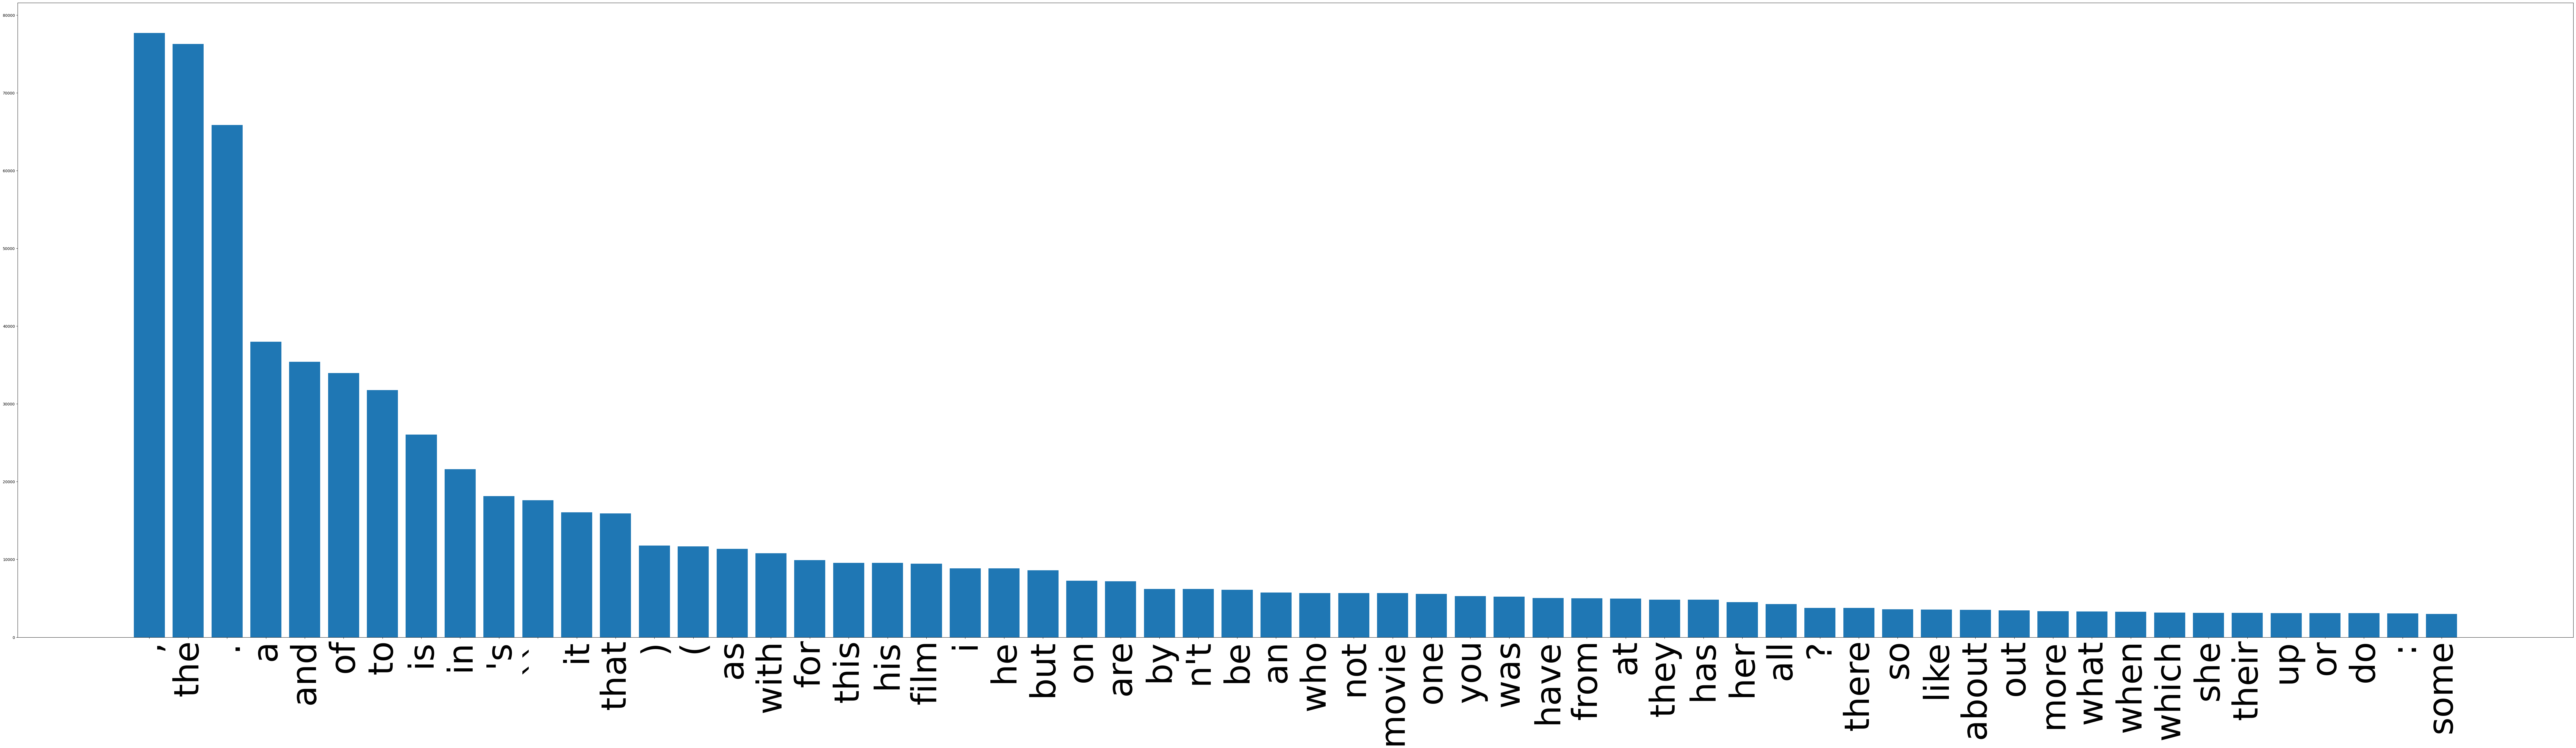

In [13]:
plot_vocab_count(vocab,0,60)

In [14]:
df['Review']=list(map(remove_punc,df["Review"]))

In [15]:
vocab=vocab_counter(df["Review"])

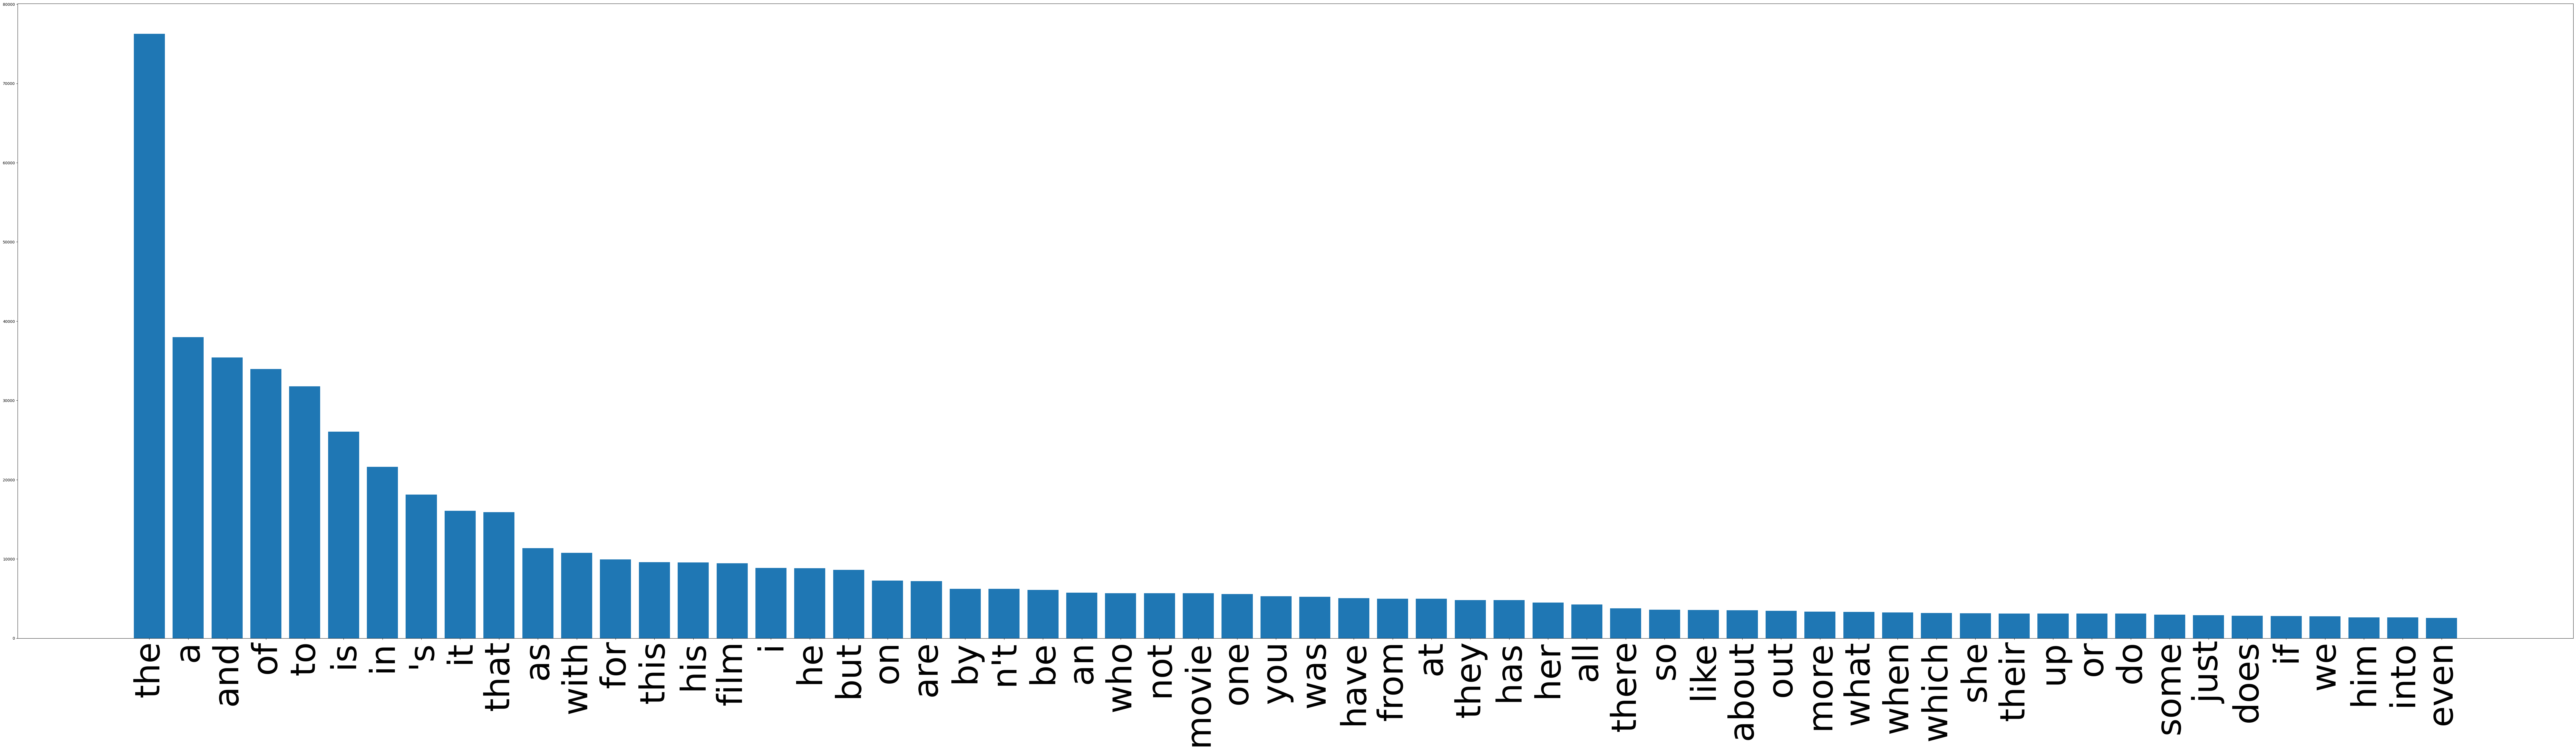

In [16]:
plot_vocab_count(vocab,0,60)

In [17]:
df['descs']=list(map(descriptors_extractor,df["Review"]))

In [18]:
df.head()

,Review,class,descs
0,plot two teen couples go to a church party dri...,0,go then get guys continues see has 's watch so...
1,the happy bastard 's quick movie review damn t...,0,happy quick y2k 's got head starring regarding...
2,it is movies like these that make a jaded movi...,0,is make jaded timex based late same tells refo...
3,quest for camelot is warner bros first feature...,0,is warner first feature-length fully-animated ...
4,synopsis a mentally unstable man undergoing ps...,0,mentally unstable undergoing psychotherapy pot...


In [19]:
df.head()

,Review,class,descs
0,plot two teen couples go to a church party dri...,0,go then get guys continues see has 's watch so...
1,the happy bastard 's quick movie review damn t...,0,happy quick y2k 's got head starring regarding...
2,it is movies like these that make a jaded movi...,0,is make jaded timex based late same tells refo...
3,quest for camelot is warner bros first feature...,0,is warner first feature-length fully-animated ...
4,synopsis a mentally unstable man undergoing ps...,0,mentally unstable undergoing psychotherapy pot...


In [20]:
vocab=vocab_counter(df["descs"])

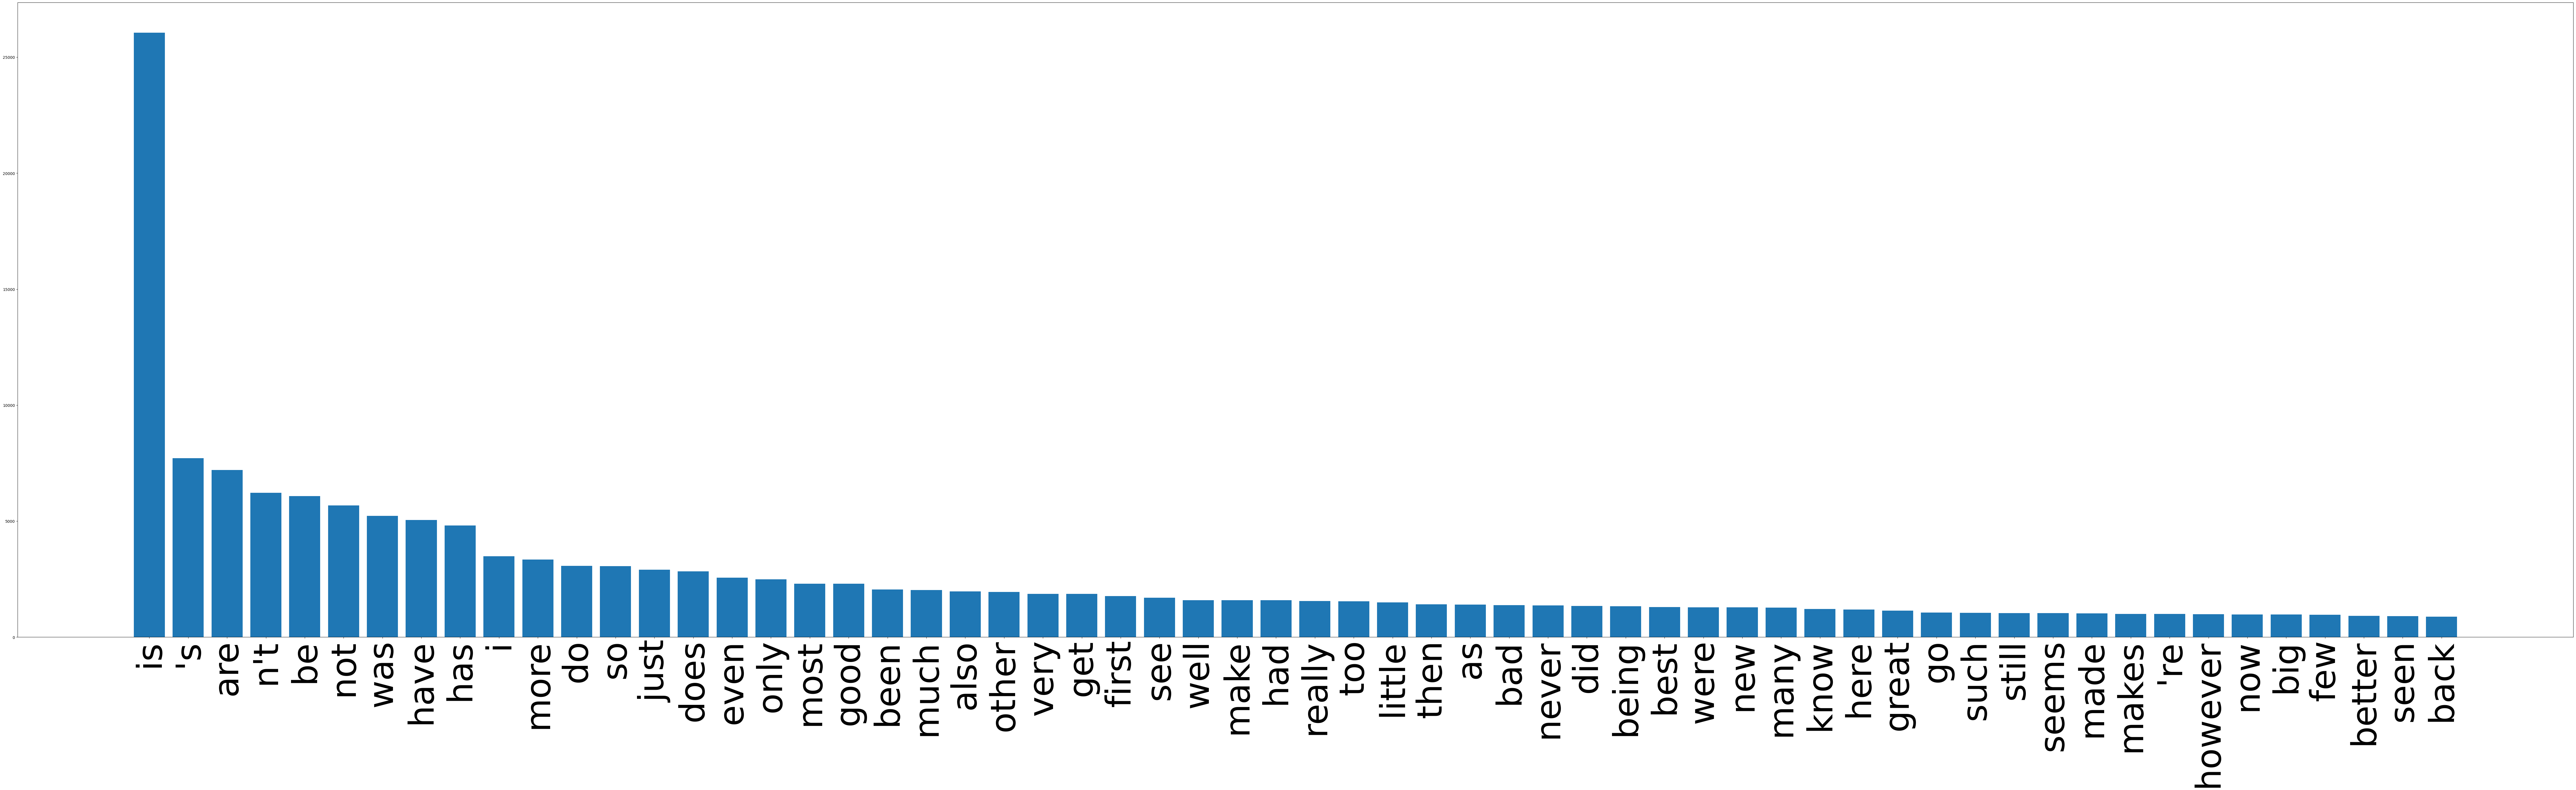

In [21]:
plot_vocab_count(vocab,0,60)

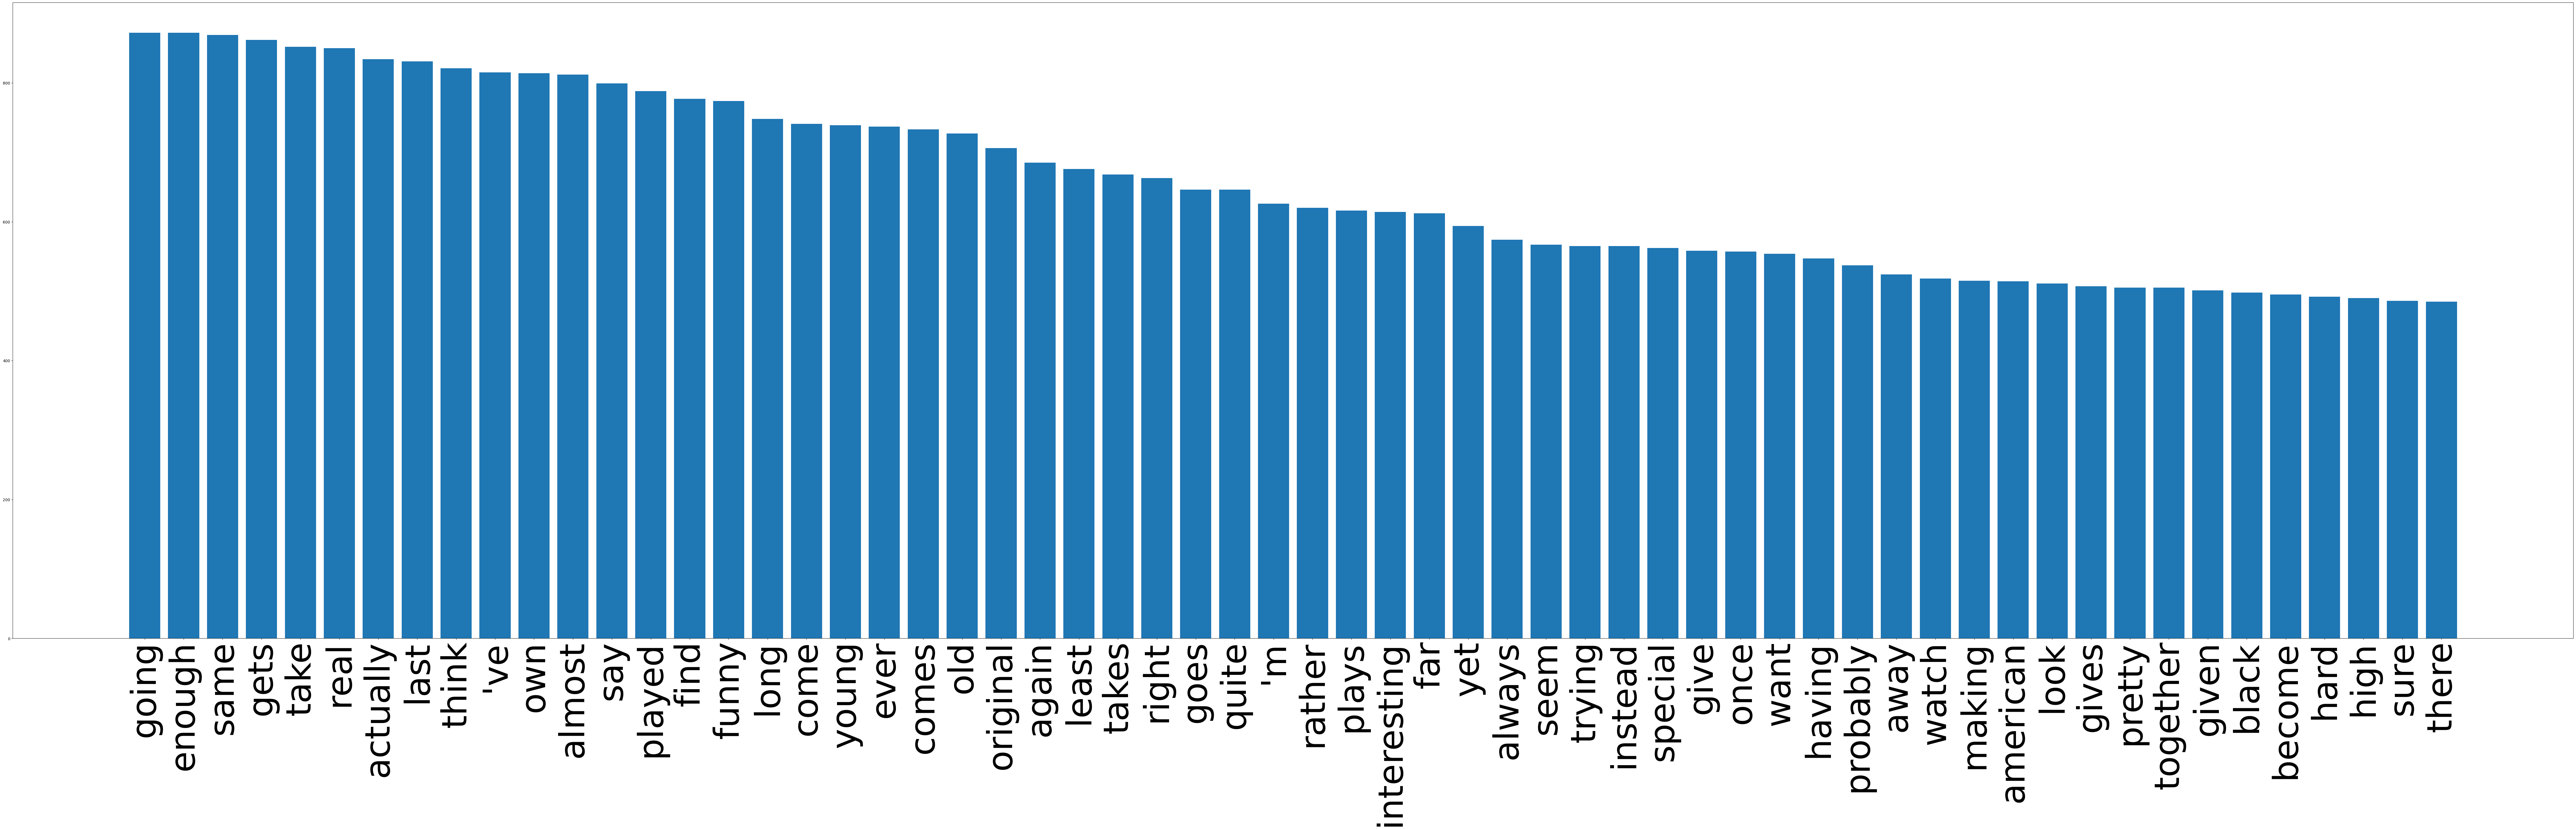

In [22]:
plot_vocab_count(vocab,60,120)

In [23]:
df["StemmedData"]=list(map(stem,df['descs']))

In [24]:
df.head()

,Review,class,descs,StemmedData
0,plot two teen couples go to a church party dri...,0,go then get guys continues see has 's watch so...,go then get guy continu see ha 's watch sorta ...
1,the happy bastard 's quick movie review damn t...,0,happy quick y2k 's got head starring regarding...,happi quick y2k 's got head star regard come d...
2,it is movies like these that make a jaded movi...,0,is make jaded timex based late same tells refo...,is make jade timex base late same tell reform ...
3,quest for camelot is warner bros first feature...,0,is warner first feature-length fully-animated ...,is warner first feature-length fully-anim stea...
4,synopsis a mentally unstable man undergoing ps...,0,mentally unstable undergoing psychotherapy pot...,mental unstabl undergo psychotherapi potenti f...


# Text Preprocessing

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import  word_tokenize,sent_tokenize
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv=TfidfVectorizer(stop_words='english')
vectorized_data=tfv.fit_transform(df['descs'])

In [27]:
v=list()
for row in vectorized_data.toarray():
    v.append(row)

In [28]:
df['TfIdF']=v

# Modeling

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(v,df['class'],test_size=0.3,random_state=2002)

In [30]:
len(X_train),len(X_test),y_train.shape,y_test.shape

(1400, 600, (1400,), (600,))

In [31]:
from sklearn.naive_bayes import BernoulliNB
NB=BernoulliNB()
NB.fit(X_train, y_train)
NB.score(X_train,y_train)

0.9721428571428572

In [32]:
NB.score(X_test,y_test)

0.83

In [33]:
print(classification_report(NB.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       348
           1       0.76      0.88      0.81       252

    accuracy                           0.83       600
   macro avg       0.83      0.84      0.83       600
weighted avg       0.84      0.83      0.83       600



In [34]:
from sklearn.linear_model import LogisticRegression
Base_LR=LogisticRegression(random_state=2002)
Base_LR.fit(X_train,y_train)
Base_LR.score(X_train,y_train)

0.9842857142857143

In [35]:
Base_LR.score(X_test,y_test)

0.85

In [36]:
print(classification_report(Base_LR.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       292
           1       0.87      0.83      0.85       308

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



In [37]:
print(confusion_matrix(Base_LR.predict(X_test),y_test))

[[254  38]
 [ 52 256]]


In [38]:
from sklearn.linear_model import LogisticRegression
L2_LR=LogisticRegression(penalty="l2",random_state=2002,C=100)
L2_LR.fit(X_train,y_train)
L2_LR.score(X_train,y_train)

1.0

In [39]:
L2_LR.score(X_test,y_test)

0.8633333333333333

In [40]:
from sklearn.linear_model import LogisticRegression
L1_LR=LogisticRegression(penalty="l1",solver="liblinear",random_state=2002,C=10)
L1_LR.fit(X_train,y_train)
L1_LR.score(X_train,y_train)

0.9992857142857143

In [42]:
L1_LR.score(X_test,y_test)

0.8166666666666667

In [43]:
from sklearn.linear_model import RidgeClassifier
R_LR=RidgeClassifier(alpha=1.004,random_state=2002)
R_LR.fit(X_train,y_train)
R_LR.score(X_train,y_train)

1.0

In [44]:
R_LR.score(X_test,y_test)

0.8616666666666667

## Saving

In [45]:
joblib.dump(tfv,"tfv.pickle")
joblib.dump(L2_LR,"model.pickle")


['model.pickle']